# Overhead Crane System - Model Predictive Controller Design

This project aims to design a Model Predictive Controller (MPC) for an overhead crane system, involving controller tuning and utilizing a state-space model to achieve specific parametric objectives.

## System Description

The crane system is modeled as an inverted pendulum assembly, with the counterweight's force used to control the cart's displacement. MPC is employed to precisely terminate the displacement at a designated point. The primary objective is to adjust the force applied to the cart, guiding the pendulum mass from an initial position of -1 to a target position of 0. This is achieved by ensuring the pendulum starts and ends with zero velocities and angles, adhering to specified input criteria.

## State Space Model

In a simplified formulation, the system's state variables are defined as follows:

Consider a simple formulation where:
\begin{aligned}
y(t)\ is\ the \ position,
\end{aligned}

\begin{aligned}
v(t)\ is\ the\ velocity,
\end{aligned}

\begin{aligned}
θ(t)\ is\ the\ angle,
\end{aligned}

\begin{aligned}
q(t)\ is\ the\ angular\ rate\
\end{aligned}

\begin{aligned}
u(t)\ is\ the\ force\ on\ the\ cart
\end{aligned}

The control input $u(t)$ includes the velocity $v(t)$ and the position $y(t)$.

The discrete-time dynamics follow the equations:
\begin{equation}
 \frac{dy}{dt} = u(t)
\end{equation}

\begin{equation}
 \frac{dv}{dt} = θ(t).ε + u(t)
\end{equation}

\begin{equation}
 \frac{dθ}{dt} = q(t)
\end{equation}

\begin{equation}
 \frac{dq}{dt} = -θ(t) - u(t)
\end{equation}

\begin{equation}
where\ ε= \frac{m_1 + m_2}{n}
\end{equation}

##Problem Formulation

The optimization problem is formulated to minimize the function

\begin{aligned}
\min_{u} \quad & ||y(t)+v(t)+θ(t)+q(t)||^2 \\
\end{aligned}

The objective is to minimize the function value at the destination location.

This approach integrates the dynamics of the system, MPC control strategy, and optimization objectives to achieve precise control over the overhead crane system, meeting specific parametric goals.


In [ ]:
# Installing GEKKO package
!pip install gekko

# Crane Control Challenge

In this scenario, a crane system is in focus, featuring a suspended load attached to a cable. The primary objective is to orchestrate precise control over the crane's horizontal movement, ensuring stability in load positioning.

## Control Strategy

The chosen control strategy for this task is Model Predictive Control (MPC). MPC employs a dynamic model of the system to anticipate future behavior and optimize control inputs over a finite time horizon.

## Maneuver Goals

The crane is tasked with executing a sequence of movements, smoothly transitioning the load from an initial position at y = -1.0 to a target position at y = 0.0. This operation must be completed within a 10-second timeframe, demanding a meticulously tuned control approach that considers both system dynamics and time constraints.

## Parameter Validation

Critical parameters, including the crane velocity (v), load angle (θ), and any adjustable crane parameters, need verification both before and after the maneuver. This validation step is crucial to ensuring the stability and desired state of the crane system.

## Temporal Constraint

The entire maneuver must be accomplished within a specified 8-second timeframe, introducing a temporal dimension to the control problem.

To sum up, the challenge involves implementing a Model Predictive Controller to govern the crane system's motion, orchestrating a predefined series of movements to smoothly relocate the suspended load within a specified time. Verifying key parameters before and after the maneuver is vital for maintaining system stability.


# Sample Code
The first setep is to install GEKKO package and the rest of the sample code is given below.

In [ ]:
# Importing packages
import numpy as np
import matplotlib.animation as animation
from gekko import GEKKO

# Defining a model
model = GEKKO()

# Defining time horizon, 10s to ensure stationarity
model.time = np.linspace(0, 10, 100)

# Defining item and counter weight
m2 = 2
m1 = 10

# Defining Model Parameters
mass1 = model.Param(value=m1)   # Mass of Cart
mass2 = model.Param(value=m2)   # Mass of transported item
t = 8                           # Time by which the object reaches the destination location

final = np.zeros(len(model.time))
for i in range(len(model.time)):
    if model.time[i] < t:
        final[i] = 0
    else:
        final[i] = 1
final = model.Param(value=final)

# Defining the State Variables Initial Conditions

# Un-Controlled Variables
q = model.Var(value=0)          # Angular Rate
theta = model.Var(value=0)      # Angle

# Controlled Variables
v = model.Var(value=0)          # Velocity
y = model.Var(value=-1)         # Position goes from -1 to 0

# Definining the Foce on the cart (Manupulated Variable)
u = model.Var(value=0)          # Force on the cart

# Defining Mass Fraction variable (Used for simplification)
epsilon = model.Intermediate(mass2 / (mass1 + mass2))

# Defining List of Equations
model.Equation(theta.dt() == q)
model.Equation(q.dt() == - u - theta)
model.Equation(v.dt() == theta * epsilon + u)
model.Equation(y.dt() == v)

# Defining Objective Function
model.Obj(final * (y**2 + v**2 + theta**2 + q**2))

# To minimize change of MV
model.Obj(0.0002 * u**2)

# Control
model.options.IMODE = 6

# Solve
model.solve(disp=True)


apm 34.73.161.156_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            1
   Connections  :            0
   Equations    :            7
   Residuals    :            6
 
 Number of state variables:            891
 Number of total equations: -          792
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

# Crane Control Challenge - Energy Optimization

In addressing the crane control challenge, a key focus is on minimizing the force exerted on the crane's load during both forward and backward movements. This optimization aims to enhance efficiency and reduce overall energy or fuel consumption required for an effective maneuver.

## Control Strategy Adjustment

Within the framework of Model Predictive Control (MPC), the emphasis shifts to fine-tuning controller parameters with the specific objective of minimizing force exertion. This entails optimizing the predictive model to achieve the desired outcome while prioritizing energy efficiency. The MPC controller anticipates the crane system's future behavior and dynamically adjusts control inputs at each step to attain the optimal trajectory with the least force applied to the load.

## Energy-Conscious Tuning

The tuning process involves a careful balance, ensuring that the crane maneuvers effectively while minimizing energy input. By prioritizing the reduction of force or energy consumption, this tuning approach aligns with the overarching goal of achieving maneuverability with a strong emphasis on efficiency and resource conservation.

In summary, the revised challenge now incorporates a nuanced focus on energy optimization within the Model Predictive Control framework. The objective is to fine-tune controller settings to minimize the force exerted on the crane's load during movements, striking a balance between effective maneuverability and energy efficiency.


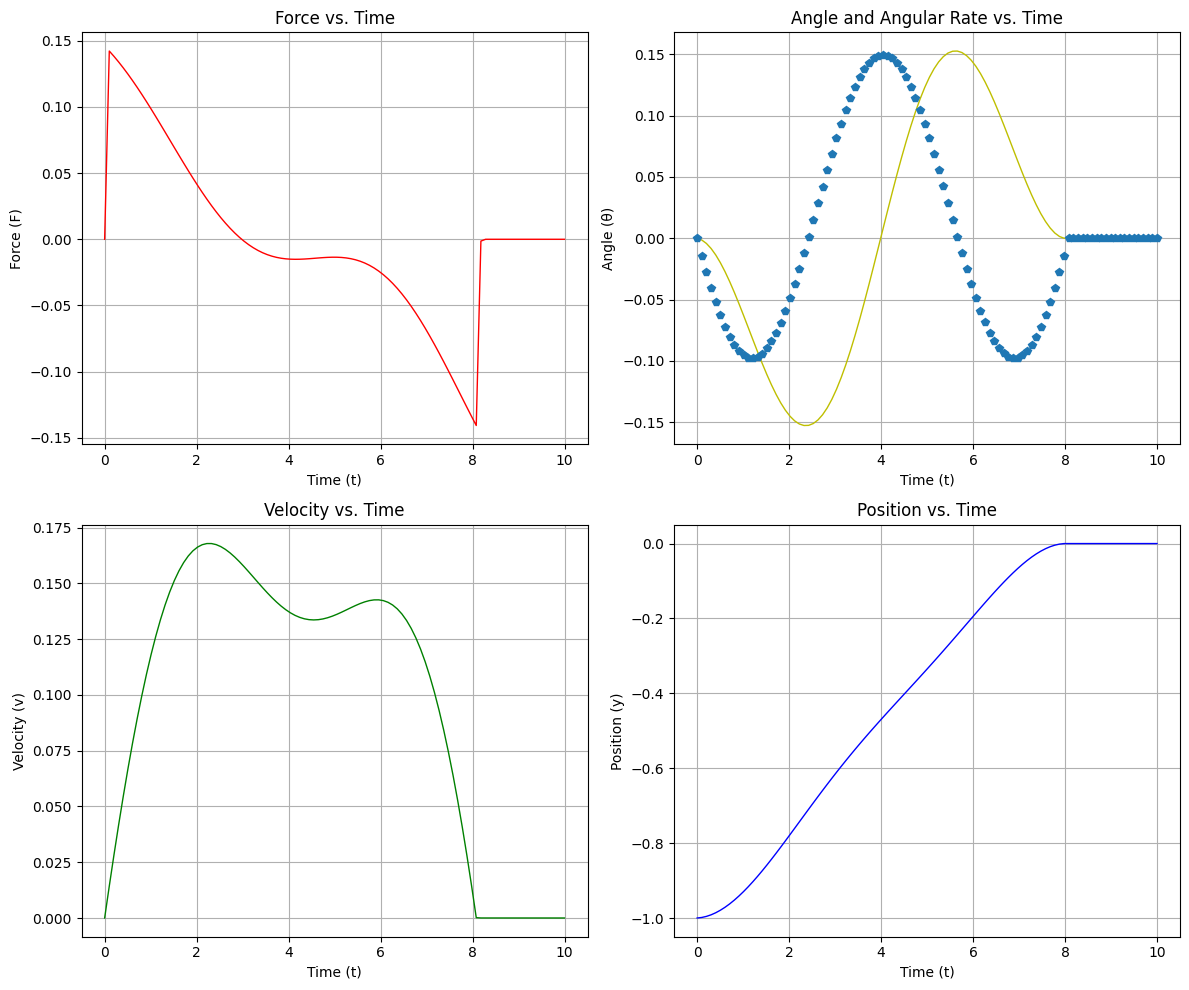

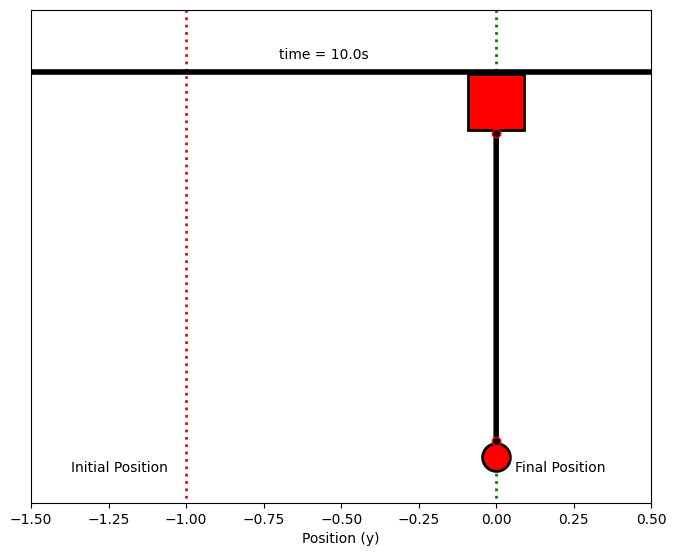

In [ ]:
# Plotting Part:

#Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

# Compute the error using numpy arrays
error = np.array(y.value) - np.array(final.value)

# Plot Force
plt.subplot(221)
plt.plot(model.time, u.value, 'r', lw=1)
plt.xlabel('Time (t)')
plt.ylabel('Force (F)')
plt.title('Force vs. Time')
plt.grid(True)

# Plot Angle and Angular Rate
plt.subplot(222)
plt.plot(model.time, theta.value, 'y', lw=1)
plt.plot(model.time, q.value, 'p', lw=1)
plt.xlabel('Time (t)')
plt.ylabel('Angle (θ)')
plt.title('Angle and Angular Rate vs. Time')
plt.grid(True)

# Plot Velocity
plt.subplot(223)
plt.plot(model.time, v.value, 'g', lw=1)
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.title('Velocity vs. Time')
plt.grid(True)

# Plot Position
plt.subplot(224)
plt.plot(model.time, y.value, 'b', lw=1)
plt.xlabel('Time (t)')
plt.ylabel('Position (y)')
plt.title('Position vs. Time')
plt.grid(True)

plt.tight_layout()

# Animation
plt.rcParams['animation.html'] = 'html5'

y1 = np.zeros(len(model.time))
x1 = y.value

# Considering length of space = 1
y2 = -1 * np.cos(theta.value) + y1
y_2 = -1.05 * np.cos(theta.value) + y1
x2 = 1 * np.sin(theta.value) + x1
x_2 = 1.05 * np.sin(theta.value) + x1

fig = plt.figure(figsize=(8, 6.4))

ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1.5, 0.5), ylim=(-1.2, 0.4))
ax.set_xlabel('Position (y)')
ax.get_yaxis().set_visible(False)

start, = ax.plot([-1, -1], [-1.5, 1], 'r:', lw=2)
finish, = ax.plot([0, 0], [-1.5, 1], 'g:', lw=2)
rail, = ax.plot([-1.5, 0.5], [0.2, 0.2], color='black', lw=4)
ma_1, = ax.plot([], [], linestyle='None', marker='s', markersize=40, markeredgecolor='k', color='red', markeredgewidth=2)
ma_2, = ax.plot([], [], linestyle='None', marker='o', markersize=20, markeredgecolor='k', color='red', markeredgewidth=2)
line, = ax.plot([], [], 'o-', color='black', lw=4, markersize=6, markeredgecolor='r', markerfacecolor='k')
time_template = 'time = %.1fs'
time_text = ax.text(0.4, 0.9, '', transform=ax.transAxes)

start_text = ax.text(-1.06, -1.1, 'Initial Position', ha='right')
end_text = ax.text(0.06, -1.1, 'Final Position', ha='left')

# Initialization
def init():
    ma_1.set_data([], [])
    ma_2.set_data([], [])
    line.set_data([], [])
    time_text.set_text('')
    return ma_1, ma_2, time_text, line

# Animation
def animate(i):
    ma_1.set_data([x1[i]], [y1[i] + 0.1])
    ma_2.set_data([x_2[i]], [y_2[i]])
    line.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    time_text.set_text(time_template % model.time[i])
    return ma_1, ma_2, time_text, line

ani_a = animation.FuncAnimation(fig, animate, np.arange(1, len(model.time)), interval=0.01, blit=False, init_func=init)

# Save Animation
ani_a.save('Crane_Control_Animation.mp4', fps=10)

# Display the plot and animation
plt.show()


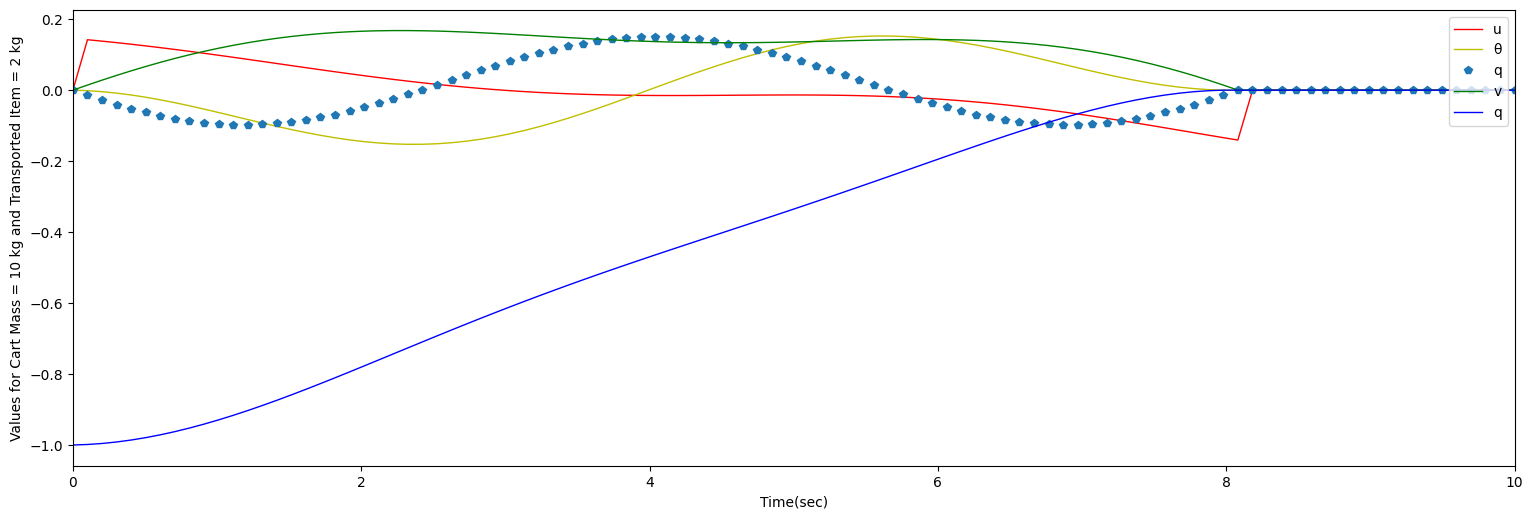

In [ ]:
fig2 = plt.figure(figsize=(30, 10))

# Velocity_Plot
ax1 = fig2.add_subplot(221)
ax1.plot(model.time, u.value, 'r', lw=1, label=r'u')
ax1.plot(model.time, theta.value, 'y', lw=1, label=r'θ')
ax1.plot(model.time, q.value,'p', lw=1, label=r'q')
ax1.plot(model.time, v.value, 'g', lw=1, label=r'v')
ax1.plot(model.time, y.value, 'b', lw=1, label=r'q')
ax1.legend(loc=1)
ax1.set_ylabel('Values for Cart Mass = {} kg and Transported Item = {} kg'.format(m1, m2))
ax1.set_xlabel('Time(sec)')
ax1.set_xlim(model.time[0], model.time[-1])
plt.legend(loc=1)
plt.tight_layout()
plt.show()